In [2]:
!pip install graphviz

In [3]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import multiprocessing

from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text, plot_tree
# 디시전트리는 과적합이 잘남(주의) 디시전리그레서 잘안씀
from sklearn import metrics
import graphviz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# 엔트로피라는 개념, 지니계수라는 개념을 이용해 분류를 함.
# 불순도가 증가한다.
# 분류하기 전의 엔트로피와 분류후의 엔트로피가 최대가 되도록하는 것을 먼저
# 불순도가 가장 낮은 상태에서 높은 순으로 진행되는거임. 
# 1번 수행. 손톱케어 여부로 남녀 구분
# 2번 수행.. 귀걸이 착용여부
# 3번 수행.. 반지착용 여부 ....
# 나무형식으로 되어있어서 트리라고 얘기함.
# 불순도를 지표로 만든 것을 엔트로피라고 함.
# 불순도가 높을수록 특정 레벨의 데이터가 뽑힐 확률은 낮아진다.
# 엔트로피가 낮은상태에서 높은상태로 분류하는 것. = 디시전 트리

### 지니계수를 이용하여 데이터를 분할
- 지니계수 : 경제학에서 불평등지수를 나타낼 때 사용하는 것으로 0일 때 완전 평등, 1일 때 완전 불평등을 의미
- 머신러닝에서는 데이터가 다양한 값을 가질수록 평등하며 특정 값으로 쏠릴 때 불평등한 값이 됩니다.
- 다양성이 낮을수록 균일도가 높다는 의미로 1로 갈수록 균일도가 높아 지니계수가 높은 속성을 기준으로 분할

- 개념은 엔트로피랑 상당히 비슷
- 하나만있으면 불평등(엔트로피 : 불순도가 낮은 상태), 여러개 분배되어있으면 평등(엔트로피: 불순도가 높은 상태)


# 결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
* **if-then-else** 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을 수록 복잡한 모델
* 결정 트리 장점
  * 이해와 해석이 쉽다
  * 시각화가 용이하다
  * 많은 데이터 전처리가 필요하지 않다


### Decision Tree Classifier의 파라미터

#### 핵심 파라미터

##### min_samples_split	: 노드를 분할하기 위한 최소한의 샘플 데이터수 
( 과적합을 제어하는데 사용 )
- Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가<br>
##### min_samples_leaf: 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- min_samples_split과 함께 과적합 제어 용도<br>
- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요<br>
##### max_features: 최적의 분할을 위해 고려할 최대 feature 개수<
- Default = None → 데이터 세트의 모든 피처를 사용<br>
- int형으로 지정 →피처 갯수 / float형으로 지정 →비중<br>
- sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정<br>
- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정<br>
##### max_depth	: 트리의 최대 깊이<br>
- default = None<br>
→ 완벽하게 클래스 값이 결정될 때 까지 분할<br>
또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할<br>
- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요<br>
##### max_leaf_nodes:	리프노드의 최대 개수<br>


In [4]:
iris = load_iris()

In [5]:
iris_df = pd.DataFrame( iris.data)
iris_df.columns = iris['feature_names']
iris_df['specis'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specis
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
x_data = iris['data']
y_data = iris['target']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.2,
                                                    stratify=y_data)

In [11]:
model_tree = DecisionTreeClassifier(criterion='entropy')
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/


In [22]:
import os
os.environ['PATH']+= os.pathsep+r'C:\Program Files\Graphviz\bin'
# pathsep 이 윈도우즈에서는 ;이걸쓴다는건가?..
# r을 붙인 이유 qin 앞에 \ 때문에 
# \\ 이스케이푸 하나 더 붙여도 됨.
# 내부적으로 실행파일을 실행해서 그려주는 것.

In [23]:
export_graphviz(model_tree, out_file='tree.dot',
                class_names=iris['target_names'],
               feature_names=iris['feature_names'])
# class name은 분류 이름
# tree.dot파일이 만들어짐 

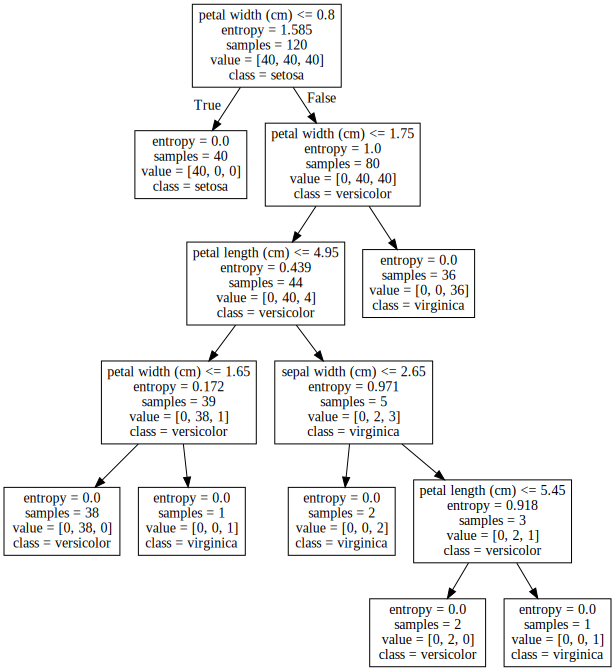

In [27]:
fp = open('./tree.dot')
dot_graph = fp.read()
graphviz.Source(dot_graph)